In [1]:
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import pickle

In [2]:
# Read in the saved camera matrix and distortion coefficients
# These are the arrays calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
dist = dist_pickle["dist"]
mtx = dist_pickle["mtx"]


In [3]:
# Read in an image

img = cv2.imread('images/GOPR0060.jpg')
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y

img_size = (img.shape[1], img.shape[0])
img_size

(1280, 960)

In [4]:
# MODIFY THIS FUNCTION TO GENERATE OUTPUT 
# THAT LOOKS LIKE THE IMAGE ABOVE
def corners_unwarp(img, nx, ny, mtx, dist):
    
    # Pass in your image into this function
    # Write code to do the following steps
    
    # 1) Undistort using mtx and dist
    undist  = cv2.undistort(img, mtx, dist, None, mtx)
    
    # 2) Convert to grayscale
    gray = cv2.cvtColor(undist , cv2.COLOR_BGR2GRAY)
    
    # 3) Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
    # 4) If corners found: 
            # a) draw corners
    if ret == True:
        cv2.drawChessboardCorners(undist, (nx, ny), corners, ret)
        
        offset = 100 # offset for dst points
        
        img_size = (gray.shape[1], gray.shape[0])
        print(img_size)
            # b) define 4 source points src = np.float32([[,],[,],[,],[,]])
                 #Note: you could pick any four of the detected corners 
                 # as long as those four corners define a rectangle
                 #One especially smart way to do this would be to use four well-chosen
                 # corners that were automatically detected during the undistortion steps
                 #We recommend using the automatic detection of corners in your code
        src = np.float32([[corners[nx-1][0][0], corners[nx-1][0][1]],
                          [corners[nx*ny-1][0][0], corners[nx*ny-1][0][1]],
                          [corners[nx*ny-nx][0][0], corners[nx*ny-nx][0][1]],
                          [corners[0][0][0], corners[0][0][1]]])
        
        # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
        
        x4 = offset
        y4 = offset
        
        x1 = img_size[0]-offset
        y1 = offset
        
        x2 = img_size[0]-offset
        y2 = img_size[1]-offset
    
        x3 = offset
        y3 = img_size[1]-offset
        
        
        dst = np.float32([[x1,y1],[x2,y2],[x3,y3],[x4,y4]])    
    
        # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
        M = cv2.getPerspectiveTransform(src, dst)
        
        # e) use cv2.warpPerspective() to warp your image to a top-down view
        warped = cv2.warpPerspective(undist, M, img_size, flags=cv2.INTER_LINEAR)
    
    return warped, M

In [5]:

top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)


(1280, 960)


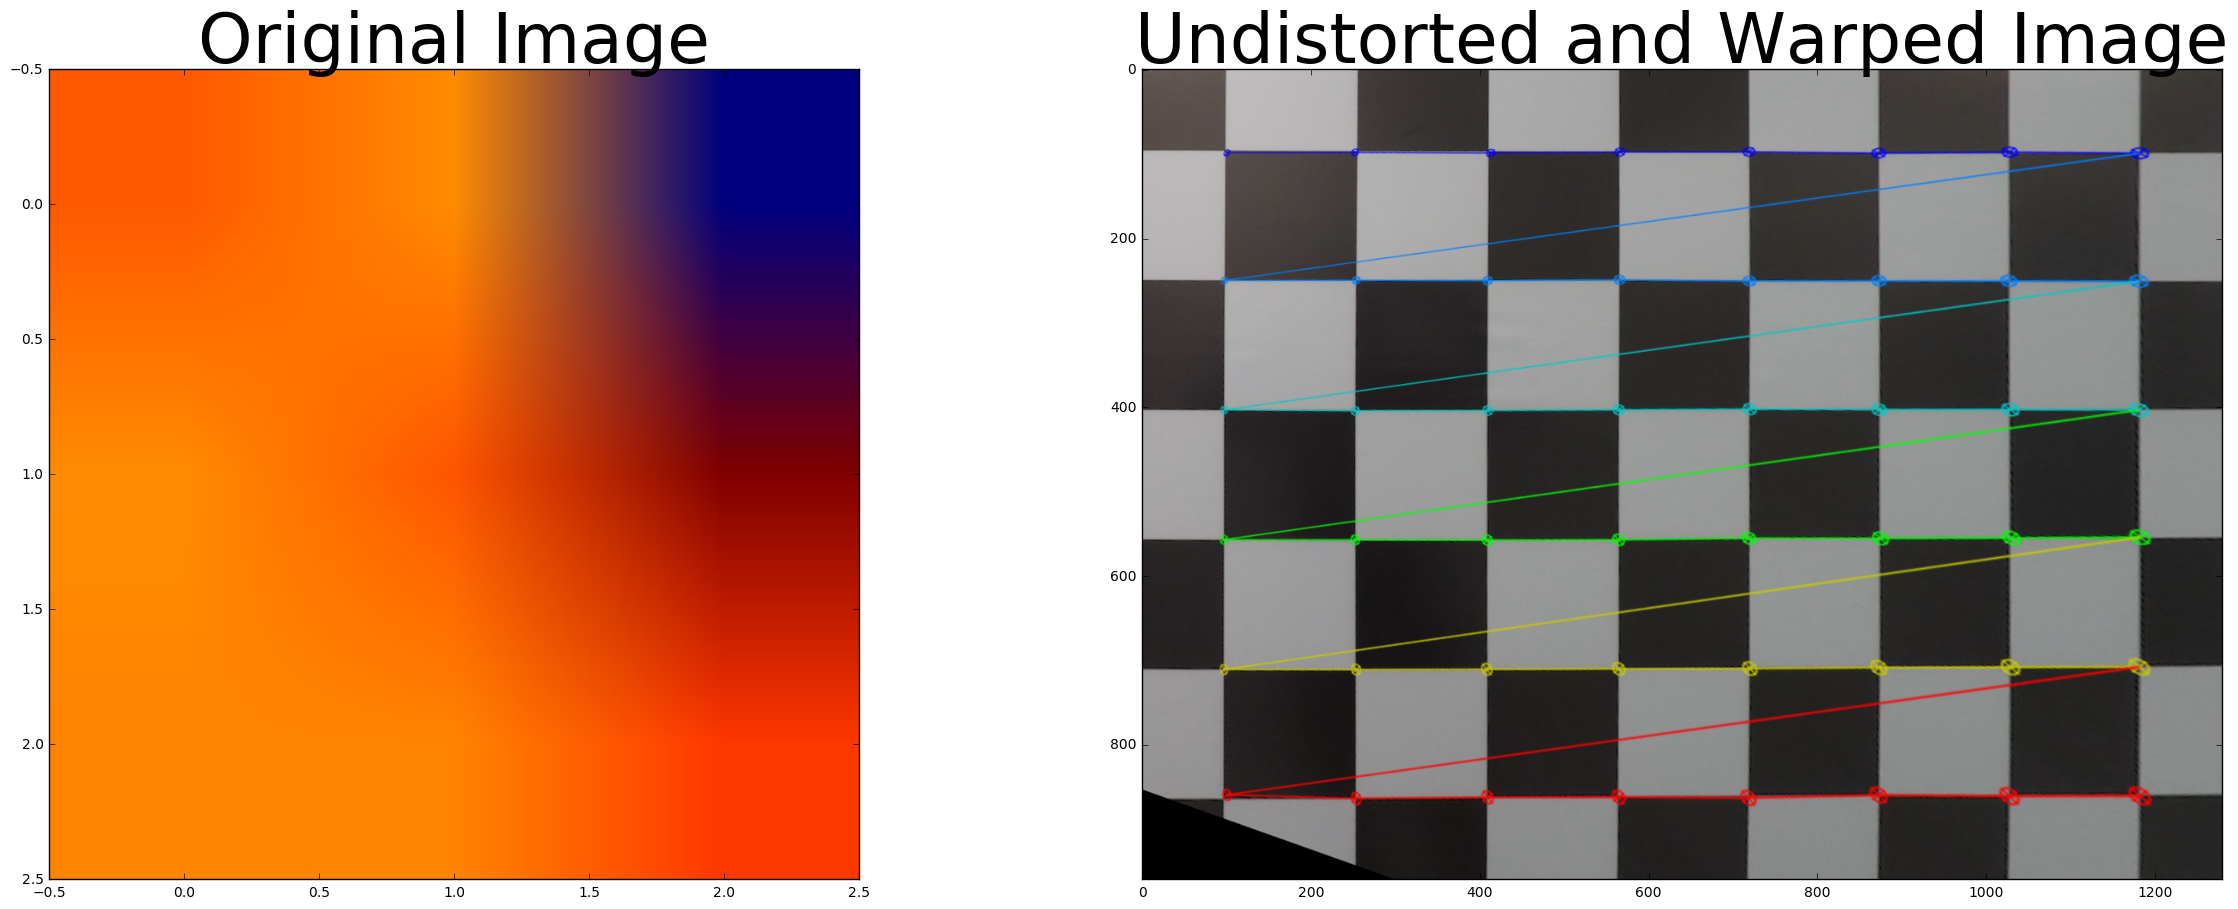

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [ ]:
plt.imshow(img)

In [ ]:
undist = cv2.undistort(img, mtx, dist, None, mtx)
gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
if ret == True:
    cv2.drawChessboardCorners(undist, (nx, ny), corners, ret)

In [ ]:
x1 = corners[nx-1][0][0] 
y1 = corners[nx-1][0][1]

x2 = corners[nx*ny-1][0][0]
y2 = corners[nx*ny-1][0][1]

x3 = corners[nx*ny-nx][0][0]
y3 = corners[nx*ny-nx][0][1]

x4 = corners[0][0][0] 
y4 = corners[0][0][1]

print(x4,y4)
print(x1,y1)
print(x2,y2)
print(x3,y3)

plt.imshow(undist)
plt.plot(x1, y1,"+")
plt.plot(x2, y2,"+")
plt.plot(x3, y3,"+")
plt.plot(x4, y4,"+")

src = np.float32([[x1,y1],[x2,y2],[x3,y3],[x4,y4]])


In [ ]:
#simplify above as this but its alright

print(corners[0])
print(corners[nx-1])
print(corners[-1])
print(corners[-nx])


In [ ]:

x4 = corners[0][0][0] 
y4 = corners[0][0][1]

x1 = corners[nx-1][0][0]
y1 = y4

x3 = x4
y3 = corners[nx*ny-nx][0][1]

x2 = x1
y2 = y3

print(x4,y4)
print(x1,y1)
print(x2,y2)
print(x3,y3)

plt.imshow(undist)
plt.plot(x1, y1,"+")
plt.plot(x2, y2,"+")
plt.plot(x3, y3,"+")
plt.plot(x4, y4,"+")

In [ ]:
# use an offset instead of accurate calc - simpler
offset = 100
img_size = (gray.shape[1], gray.shape[0])

x1=img_size[0]-offset
y1=offset

x2=img_size[0]-offset
y2=img_size[1]-offset

x3=offset
y3=img_size[1]-offset

x4=offset
y4=offset

dst = np.float32([[x1,y1],[x2,y2],[x3,y3],[x4,y4]])
dst

In [ ]:
M = cv2.getPerspectiveTransform(src, dst)
       
warped = cv2.warpPerspective(undist, M, img_size, flags=cv2.INTER_LINEAR)

plt.imshow(warped)